<a href="https://colab.research.google.com/github/snehaarisetti/acousticfireextinguisher/blob/main/predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              SIZE      DISTANCE       DESIBEL       AIRFLOW     FREQUENCY  \
count  15390.00000  15390.000000  15390.000000  15390.000000  15390.000000   
mean       3.00000    100.000000     96.379142      6.975634     31.611111   
std        1.41426     54.774035      8.164128      4.736187     20.939229   
min        1.00000     10.000000     72.000000      0.000000      1.000000   
25%        2.00000     50.000000     90.000000      3.200000     14.000000   
50%        3.00000    100.000000     95.000000      5.800000     27.500000   
75%        4.00000    150.000000    104.000000     11.200000     47.000000   
max        5.00000    190.000000    113.000000     17.000000     75.000000   

             STATUS  
count  15390.000000  
mean       0.489669  
std        0.499909  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.0

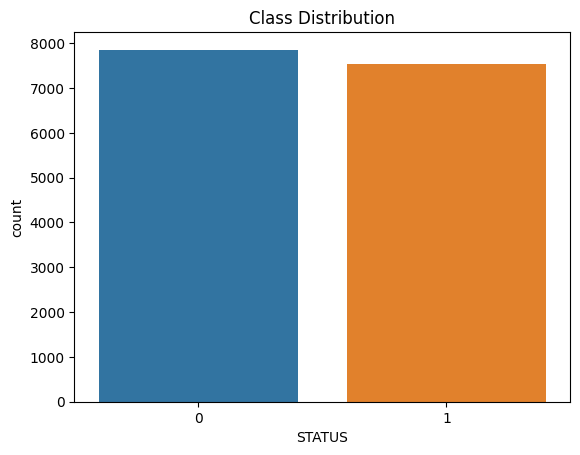

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_excel("acoustic_data.xlsx")

# Display basic statistics of numerical features
print(df.describe())

# Visualize class distribution
sns.countplot(x='STATUS', data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Encoding categorical feature 'FUEL'
df_encoded = pd.get_dummies(df, columns=['FUEL'], drop_first=True)
# Split the dataset into features (X) and target (y)
X = df_encoded.drop('STATUS', axis=1)  # Features
y = df_encoded['STATUS']               # Target

In [ ]:
# Initialize scaler and fit-transform on features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the feedforward neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Compute hidden layer activations
        self.hidden_activations = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)

        # Compute output layer activations
        self.output_activations = sigmoid(np.dot(self.hidden_activations, self.weights_hidden_output) + self.bias_output)

        return self.output_activations

    def backward(self, X, y, learning_rate):
        # Compute output layer error and delta
        output_error = y - self.output_activations
        output_delta = output_error * sigmoid_derivative(self.output_activations)

        # Compute hidden layer error and delta
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_activations)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activations.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backpropagation
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return (self.forward(X) >= 0.5).astype(int)

# Initialize neural network
input_size = X_train_scaled.shape[1]
hidden_size = 8  # Choose based on experimentation
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Perform cross-validation
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in skf.split(X_scaled, y):
    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Train the neural network on the training fold
    nn.train(X_train_fold, y_train_fold.values.reshape(-1, 1), epochs, learning_rate)

    # Make predictions on the validation fold
    y_pred_fold = nn.predict(X_val_fold)

    # Calculate accuracy for this fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

# Calculate average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)

Epoch 0, Loss: 0.2761
Epoch 100, Loss: 0.0585
Epoch 200, Loss: 0.0511
Epoch 300, Loss: 0.0464
Epoch 400, Loss: 0.0437
Epoch 500, Loss: 0.0418
Epoch 600, Loss: 0.0400
Epoch 700, Loss: 0.0385
Epoch 800, Loss: 0.0373
Epoch 900, Loss: 0.0367
Epoch 0, Loss: 0.0388
Epoch 100, Loss: 0.0379
Epoch 200, Loss: 0.0377
Epoch 300, Loss: 0.0374
Epoch 400, Loss: 0.0370
Epoch 500, Loss: 0.0369
Epoch 600, Loss: 0.0368
Epoch 700, Loss: 0.0367
Epoch 800, Loss: 0.0362
Epoch 900, Loss: 0.0357
Epoch 0, Loss: 0.0344
Epoch 100, Loss: 0.0339
Epoch 200, Loss: 0.0338
Epoch 300, Loss: 0.0336
Epoch 400, Loss: 0.0334
Epoch 500, Loss: 0.0332
Epoch 600, Loss: 0.0331
Epoch 700, Loss: 0.0330
Epoch 800, Loss: 0.0329
Epoch 900, Loss: 0.0329
Epoch 0, Loss: 0.0337
Epoch 100, Loss: 0.0333
Epoch 200, Loss: 0.0331
Epoch 300, Loss: 0.0329
Epoch 400, Loss: 0.0328
Epoch 500, Loss: 0.0327
Epoch 600, Loss: 0.0327
Epoch 700, Loss: 0.0327
Epoch 800, Loss: 0.0326
Epoch 900, Loss: 0.0326
Epoch 0, Loss: 0.0347
Epoch 100, Loss: 0.0341
Ep